# Multi Layer Perceptron (Sequential Model)

In [2]:
import pandas as pd
import numpy as np

#concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data = pd.read_csv("C:/Users/Suresh/gitam/coursera/Deep Learning/concrete_data.csv")
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [4]:
concrete_data.describe()
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [9]:
n_cols = predictors_norm.shape[1]
print(n_cols)

8


In [10]:
import keras

from keras.models import Sequential
from keras.layers import Dense

In [11]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [13]:
model = regression_model()
model.fit(predictors_norm, target, validation_split=0.3, epochs=50, verbose=2)

Epoch 1/50
23/23 [==============================] - 3s 30ms/step - loss: 1591.3805 - val_loss: 1188.0969
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 1613.2975 - val_loss: 1156.6785
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1609.1503 - val_loss: 1102.7686
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 1510.3239 - val_loss: 1017.5043
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1384.0088 - val_loss: 892.4601
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 1150.5220 - val_loss: 721.4541
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 882.6120 - val_loss: 528.1478
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 675.2562 - val_loss: 354.9519
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 456.3592 - val_loss: 248.0966
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss

# Multi Layer Perceptron (Functional API Model)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


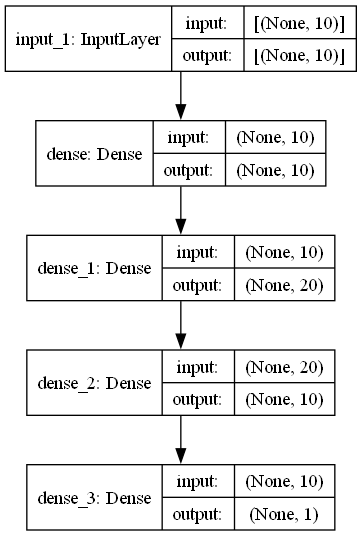

In [1]:
from tensorflow.keras.utils import plot_model  # Updated import
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the model
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

# Summarize layers
print(model.summary())

# Plot the model graph
plot_model(model, to_file='multilayer_perceptron_graph.png', show_shapes=True, show_layer_names=True)

In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydot --user

  Using cached pydot-3.0.2-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)



In [9]:
from tensorflow.keras.utils import plot_model  # Updated import
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the model
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

# Summarize layers
print(model.summary())

# Plot the model graph
plot_model(model, to_file='multilayer_perceptron_graph.png', show_shapes=True, show_layer_names=True)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/downlo